# Working with Raster data

In [1]:
#!pip install rasterio

In [2]:
# Importing raster handling library
import rasterio as rio

In [3]:
# Checking the version of the library
print(rio.__version__)

1.3.6


<div style='background:#B1F9E3; color:#000000' class= 'alert alert-box'>
Rasterio is a highly useful module for raster processing which you can use for reading and writing several different raster formats in Python. Rasterio is based on GDAL and Python automatically registers all known GDAL drivers for reading supported formats when importing the module. Most common file formats include for example TIFF and GeoTIFF, ASCII Grid and Erdas Imagine .img -files.
    </div>

In [4]:
# Reading Raster Datasets (Single band SRTM DEM for Mysuru Region)
rasterData = 'rdata/n12_e076_1arc_v3.tif'
srtmDEM=rio.open(rasterData)

In [5]:
# Check type of the variable 'srtmDEM'
type(srtmDEM)

rasterio.io.DatasetReader

In [6]:
# Read raster file properties - Coordinate System
srtmDEM.crs

CRS.from_epsg(4326)

In [7]:
# Read raster file properties - Dimensions
print(srtmDEM.width)
print(srtmDEM.height)

3601
3601


In [8]:
# Read raster file properties - Total Pixels
totalPixels = (srtmDEM.width * srtmDEM.height)
print(totalPixels)

12967201


In [9]:
# Counting Number of bands
srtmDEM.count

1

In [10]:
# Extent of the Raster Data
srtmDEM.bounds

BoundingBox(left=75.99986111111112, bottom=11.999861111111109, right=77.0001388888889, top=13.000138888888888)

In [11]:
srtmDEM.bounds.left

75.99986111111112

In [12]:
srtmDEM.bounds.right

77.0001388888889

In [13]:
srtmDEM.bounds.bottom

11.999861111111109

In [14]:
srtmDEM.bounds.top

13.000138888888888

In [15]:
# Driver (data format)
srtmDEM.driver

'GTiff'

In [16]:
# All Metadata for the whole raster dataset
srtmDEM.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32767.0,
 'width': 3601,
 'height': 3601,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0002777777777777778, 0.0, 75.99986111111112,
        0.0, -0.0002777777777777778, 13.000138888888888)}

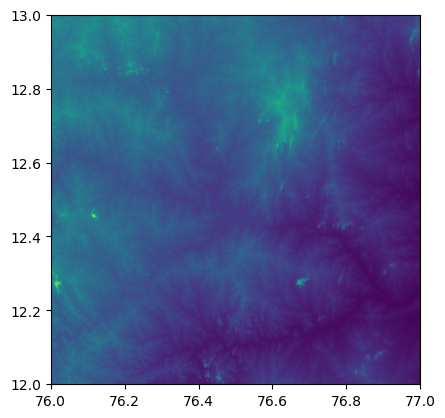

<Axes: >

In [17]:
# Visualising Raster Datasets
from rasterio.plot import show
channel = 1
show((srtmDEM, channel))
#default color

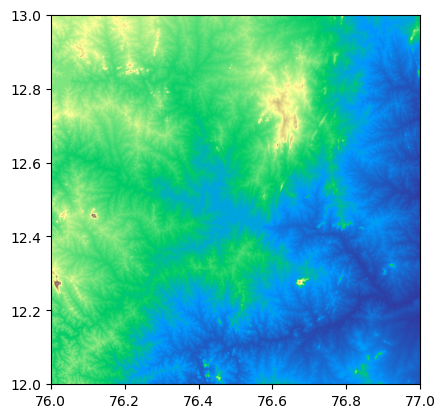

<Axes: >

In [18]:
# terrain color
show((srtmDEM, 1), cmap='terrain')

Text(0.5, 1.0, 'turbo')

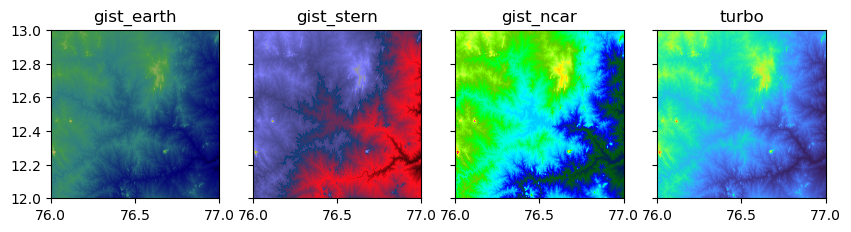

In [19]:
# Visualising Raster using Different Colors
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(10, 4), sharey=True)

# Plot Red, Green and Blue (rgb) refer https://matplotlib.org/stable/users/explain/colors/colormaps.html
show((srtmDEM, 1), cmap='gist_earth', ax=ax1)
show((srtmDEM, 1), cmap='gist_stern', ax=ax2)
show((srtmDEM, 1), cmap='gist_ncar', ax=ax3)
show((srtmDEM, 1), cmap='turbo', ax=ax4)

# Add titles
ax1.set_title("gist_earth")
ax2.set_title("gist_stern")
ax3.set_title("gist_ncar")
ax4.set_title("turbo")

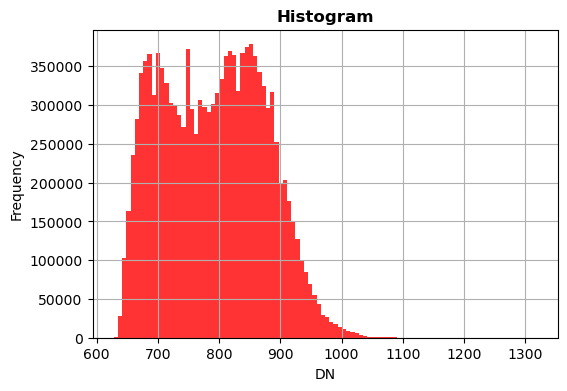

In [20]:
# Raster Histogram
from rasterio.plot import show_hist
fig, axis = plt.subplots(1, 1, figsize=(6, 4))
show_hist(srtmDEM, ax=axis, bins=100, histtype='stepfilled',lw=0.0, stacked=False, alpha=0.8)
axis.get_legend().remove()

In [21]:
# Reprojecting Raster

In [22]:
# Check the Current Coordinate System

In [23]:
srtmDEM.crs

CRS.from_epsg(4326)

In [24]:
# We need to Project for UTM Zone 43 N
# EPSG Code: 32643

In [25]:
#refer:: https://pygis.io/docs/e_raster_reproject.html

from rasterio.warp import reproject, Resampling, calculate_default_transform

#projection Parameters
dst_crs = "EPSG:32643"  # UTM Zone 43 N
inputRaster = "rdata/n12_e076_1arc_v3.tif"
outputRaster = "rdata/n12_e076_1arc_v3_utm.tif"

#opening raster Data

with rio.open(inputRaster) as src:
    src_transform = src.transform

    # calculate the transform matrix for the output
    dst_transform, width, height = calculate_default_transform(
        src.crs,
        dst_crs,
        src.width,
        src.height,
        *src.bounds,  # unpacks outer boundaries (left, bottom, right, top)
    )

    # set properties for output
    dst_kwargs = src.meta.copy()
    dst_kwargs.update(
        {
            "crs": dst_crs,
            "transform": dst_transform,
            "width": width,
            "height": height,
            "nodata": 0,  # replace 0 with np.nan
        }
    )

    with rio.open(outputRaster, "r+", **dst_kwargs) as dst:
        # iterate through bands
        for i in range(1, src.count + 1):
            reproject(
                source=rio.band(src, i),
                destination=rio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=dst_transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,
            )

In [26]:
rasterData_projected = 'rdata/n12_e076_1arc_v3_utm.tif'
srtmDEM_pcs=rio.open(rasterData_projected)

In [27]:
srtmDEM_pcs.crs

CRS.from_epsg(32643)

Text(0.5, 1.0, 'After Projection :: EPSG:32643')

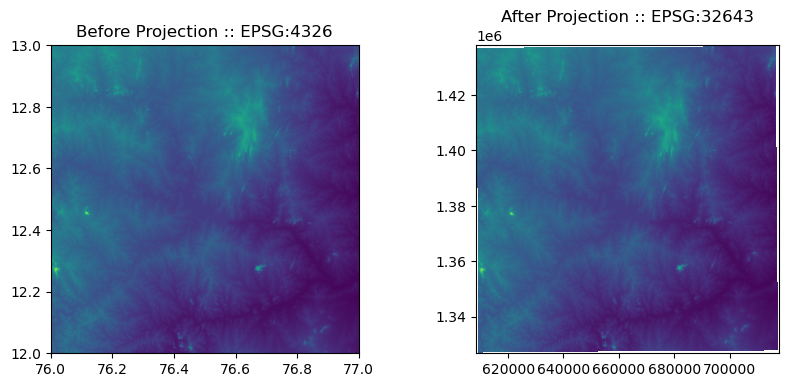

In [28]:
# before and after projection
# Visualising Raster using Different Colors
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 4), sharey=False)

# Plot Red, Green and Blue (rgb) refer https://matplotlib.org/stable/users/explain/colors/colormaps.html
show(srtmDEM, 1, ax=ax1)
show(srtmDEM_pcs, 1, ax=ax2)

# Add titles
ax1.set_title("Before Projection :: EPSG:4326")
ax2.set_title("After Projection :: EPSG:32643")

In [29]:
# Subset :: Single Band Raster

In [30]:
# Refer:: https://zia207.github.io/geospatial-python.io/lesson_06_working-with-raster-data.html#Read-and-Write-Raster-Data

In [31]:
import geopandas as gpd

In [32]:
url = 'https://kgis.ksrsac.in/kgisdocuments/PDF_KML_SHP/Taluk/Shapefiles/Taluk.zip'

In [33]:
taluk = gpd.read_file(url)

In [34]:
taluk

,KGISTalukC,LGD_TalukC,KGISTalukN,KGISDistri,created_us,created_da,last_edite,last_edi_1,SHAPE_STAr,SHAPE_STLe,geometry
0,0101,5433,Chikkodi,01,SA,2021-08-21,SURESHBV,2022-05-30,8.431570e+08,227290.811742,"POLYGON ((461944.526 1803587.439, 461941.512 1..."
1,0102,5434,Athani,01,SA,2021-08-21,SURESHBV1,2022-11-24,1.558088e+09,246654.776443,"POLYGON ((537523.310 1865366.861, 537555.695 1..."
2,0103,5435,Raibag,01,SA,2021-08-21,SURESHBV,2022-05-26,9.524996e+08,177729.924615,"MULTIPOLYGON (((468419.927 1812694.054, 468532..."
3,0104,5436,Gokak,01,SA,2021-08-21,SURESHBV1,2022-07-15,9.832083e+08,241408.860567,"POLYGON ((465331.237 1763506.052, 465330.050 1..."
4,0105,5437,Hukkeri,01,SA,2021-08-21,SURESHBV,2022-05-30,9.838254e+08,287328.718032,"POLYGON ((428776.733 1803024.344, 428821.180 1..."
...,...,...,...,...,...,...,...,...,...,...,...
231,3102,5502,Kudligi,31,SA,2021-08-21,SA,2022-01-17,1.140647e+09,227422.472343,"POLYGON ((680478.110 1646590.894, 682670.848 1..."
232,3103,5497,Hagaribommanahalli,31,SA,2021-08-21,SA,2022-01-17,8.743581e+08,168649.012564,"POLYGON ((609171.031 1668633.250, 609257.979 1..."
233,3104,5510,Harapanahalli,31,SA,2021-08-21,SURESHBV,2022-02-22,1.436109e+09,237095.928761,"POLYGON ((627033.513 1632961.725, 627033.718 1..."
234,3105,7108,Kotturu,31,SA,2021-08-21,SURESHBV,2022-02-22,5.506125e+08,167924.797019,"POLYGON ((627006.342 1633044.064, 626988.976 1..."


In [35]:
# lets filter Mysore
aoi = taluk.query('KGISTalukN == "Mysuru"')

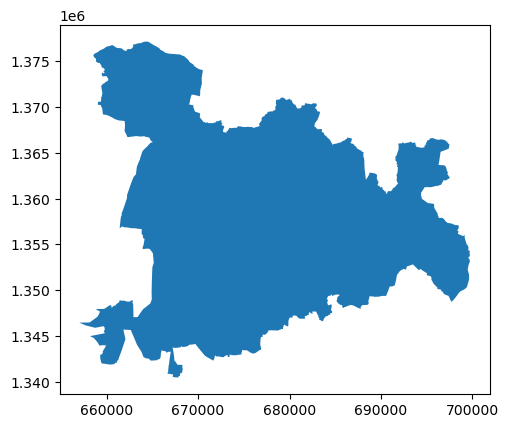

In [36]:
aoi.plot();

In [37]:
aoi.to_file("rdata/Mysuru.shp")

<Axes: >

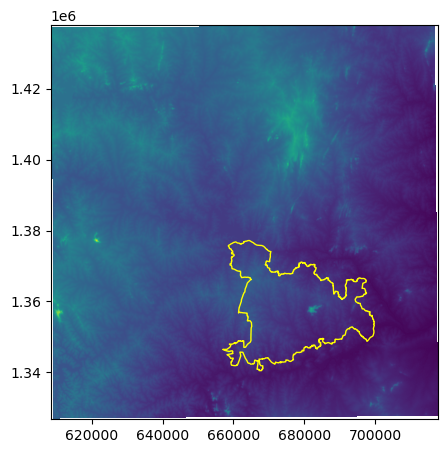

In [38]:
# Plotting both DEM and AOI
fig, ax = plt.subplots(figsize=(5, 15))
rio.plot.show(srtmDEM_pcs, ax=ax)
aoi.plot(ax=ax, facecolor='none', edgecolor='yellow')

In [39]:
# Extracting Coordinates from Shapefile by converting into JSON

In [40]:
def collectCoordinates(gdf):
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [41]:
aoi_coor = collectCoordinates(aoi)

Clipping the raster can be done easily with the mask function that we imported in the beginning from rasterio, and specifying clip=True

In [42]:
from rasterio.mask import mask
out_img, out_transform = mask(dataset=srtmDEM_pcs, shapes=aoi_coor, crop=True)

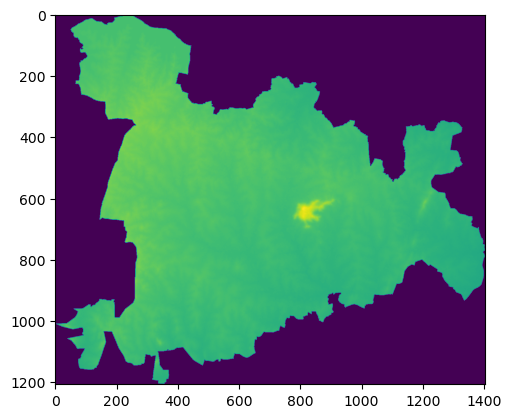

<Axes: >

In [43]:
show(out_img)

In [44]:
# Next, we need to modify the metadata. Let’s start by copying the metadata from the original data file.

In [45]:
# Copy the metadata
out_meta = srtmDEM_pcs.meta.copy()
print(out_meta)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 0.0, 'width': 3590, 'height': 3653, 'count': 1, 'crs': CRS.from_epsg(32643), 'transform': Affine(30.460856191582238, 0.0, 608431.2204172697,
       0.0, -30.460856191582238, 1438003.130403373)}


In [46]:
new_crs={'init': 'epsg:32643'}
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": new_crs}
                         )

In [47]:
# Saving the Subsetted File
out_tif =("rdata/n12_e076_1arc_v3_utm_mysore.tif")
with rio.open(out_tif, "w", **out_meta) as dest:
    dest.write(out_img)

In [48]:
# Reading and Visualising File
path = 'rdata/n12_e076_1arc_v3_utm_mysore.tif'
mysoreDEM=rio.open(path)

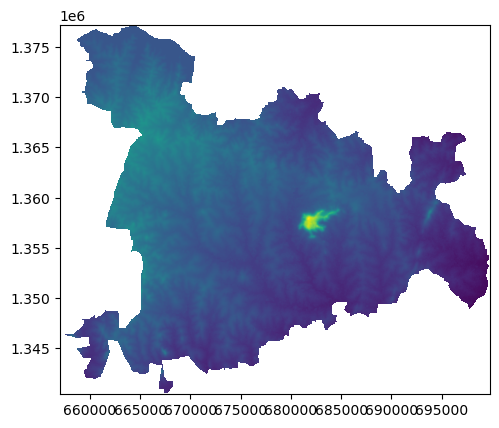

<Axes: >

In [49]:
show(mysoreDEM)